In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

### *Признаться смутила первоначальная запись. Отнёс форму записи predict([x])[0] к формату функции predict. и потому искал решение в другом месте, а решение было на поверхности.

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
    predictions = 0

    predictions = np.array(sum([eta * alg.predict(X) for alg in trees_list]))

    return predictions

In [5]:
def get_subsample(len_sample, share_sample=0.2):
    # Создаем список из индексов начальной выборки
    sample_indexes = list(range(len_sample))
    
    # Определяем длину нового списка
    len_subsample = int(np.round(len_sample * share_sample))
    
    # Создаем список из доли равной share_sample (по умолчанию 0.2) индексов начальной выборки 
    subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

    return subsample

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def residual(y, z):
    return - (z - y)

In [77]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции на доле 1/2 от первоначального объема
            subsample = get_subsample(len(X_train), 0.5)
            target = gb_predict(X_train[subsample], trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[subsample], residual(y_train[subsample], target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [78]:
# Число деревьев в ансамбле
n_trees = 20

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [79]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [80]:
def get_error_plot(n_trees, train_err, test_err, depth):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label=f'train error trees= {n_trees} depth = {depth}')
    plt.plot(list(range(n_trees)), test_err, label=f'test error trees= {n_trees} depth = {depth}')
    plt.legend(loc='upper right')
    plt.show()

In [81]:
# Число деревьев в ансамбле n_trees 
# Максимальная глубина деревьев max_depth
list_tr_errors = []
list_test_errors = []

for max_depth in range(1, 11, 3):
    for n_trees in range(1, 41, 5):
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
        list_tr_errors.append(train_errors)
        list_test_errors.append(test_errors)
        evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
        print(f'trees= {n_trees} depth = {max_depth}')
        print('-'*120)
        

Ошибка алгоритма из 1 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 24631.13446296962
Ошибка алгоритма из 1 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 23493.74587093319
trees= 1 depth = 1
------------------------------------------------------------------------------------------------------------------------
Ошибка алгоритма из 6 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 11346.269512062861
Ошибка алгоритма из 6 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 10390.189382971852
trees= 6 depth = 1
------------------------------------------------------------------------------------------------------------------------
Ошибка алгоритма из 11 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 6141.050532026981
Ошибка алгоритма из 11 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 5709.965302117411
trees= 11 depth = 1
---------------------------------------------------------------------------------------------------

Ошибка алгоритма из 16 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4134.8862108101885
trees= 16 depth = 10
------------------------------------------------------------------------------------------------------------------------
Ошибка алгоритма из 21 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 823.868770644393
Ошибка алгоритма из 21 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 3731.962915343404
trees= 21 depth = 10
------------------------------------------------------------------------------------------------------------------------
Ошибка алгоритма из 26 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 501.16093844682194
Ошибка алгоритма из 26 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 3209.0191632819583
trees= 26 depth = 10
------------------------------------------------------------------------------------------------------------------------
Ошибка алгоритма из 31 деревьев глубиной 10     с шагом 0.1 на трен

In [71]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 36 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 17.938410218838175
Ошибка алгоритма из 36 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4071.769697994217


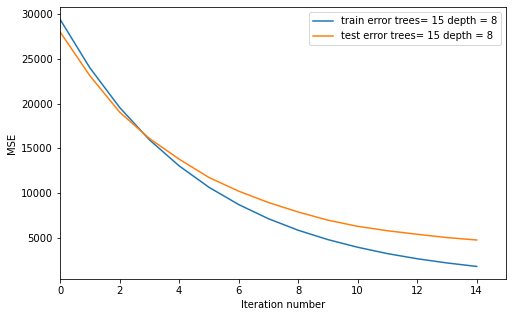

In [72]:
plt.figure(figsize=(8, 5))
n_trees = 15
max_depth = 8
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
get_error_plot(n_trees, train_errors, test_errors, max_depth)

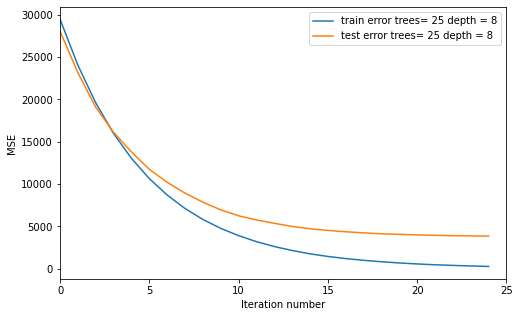

In [73]:
plt.figure(figsize=(8, 5))
n_trees = 25
max_depth = 8
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
get_error_plot(n_trees, train_errors, test_errors, max_depth)

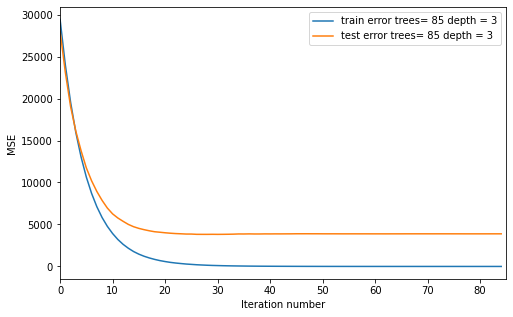

In [74]:
plt.figure(figsize=(8, 5))
n_trees = 85
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
get_error_plot(n_trees, train_errors, test_errors, 3)

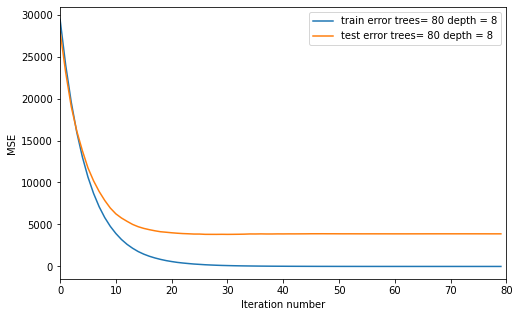

Wall time: 1.98 s


In [75]:
%%time
plt.figure(figsize=(8, 5))

n_trees = 80
max_depth = 8

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
get_error_plot(n_trees, train_errors, test_errors, max_depth)

In [76]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 80 деревьев глубиной 8     с шагом 0.1 на тренировочной выборке: 0.4779482431185968
Ошибка алгоритма из 80 деревьев глубиной 8     с шагом 0.1 на тестовой выборке: 3884.264669239963


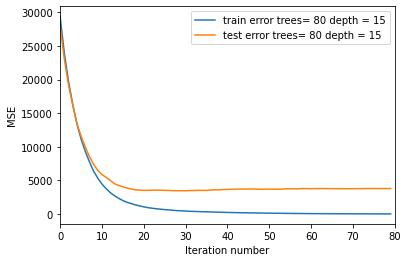

In [65]:
get_error_plot(n_trees, train_errors, test_errors, 15)

### При увеличении кол-ва обучающих деревьев ошибка снижается на обоих выборках и на обучающей и на тестовой, но при значительном его увеличении происходит переобучение на обучающей выборке, а на тестовой ниже определенного порога (3000) опуститься не можем.